# <center> Hello Guys :) Welcome to WQI Analysis and Prediction </center>

<i>Always each time open this ipnyb(i python notebook) start to execute from very first cell<br></br>
firsly import all the necessary libraries using references in vouge(like np for numpy)<br></br> 
so that can be used later on no need to call again later on<br></br>
br tag to merge new line<br></br>
span tag to give style,color...<br></br>
i tag for italics<br></br>
<u><span style="color:MediumSeaGreen">**All Green Underlined Texts are Hyperlinks to Documentations refered in this Project**</span></u><br></br>
<span style="color:blue">**_When starting this notebook each time run blue highlighted codes single time in respective below cells_**</span>
</i> 

[<span style="color:MediumSeaGreen">Text formatting in jupyter markdown</span>](https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-text-files/format-text-with-markdown-jupyter-notebook/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
from sklearn.metrics import r2_score
from ipywidgets import *
from math import *

<i>pd.read_excel() , pd.read_csv()</i> 

[<span style="color:MediumSeaGreen">**Dataset used in this project**</span>](https://www.kaggle.com/adityakadiwal/water-potability)

In [2]:
df=pd.read_csv('water_potability.csv')
df.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### <center>Phase 1 : Data validation and Pre-Processing Techniques</center>

<i>shape prints Row,Column of the pandas Dataframe</i> 

In [3]:
df.shape

(3276, 10)

<i>Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values. When this method is applied to a series of string, it returns a different output which is shown in the examples below.

Syntax: DataFrame.describe(percentiles=None, include=None, exclude=None)

Parameters:
percentile: list like data type of numbers between 0-1 to return the respective percentile
include: List of data types to be included while describing dataframe. Default is None
exclude: List of data types to be Excluded while describing dataframe. Default is None

Return type: Statistical summary of data frame.

percentile list
perc =[.20, .40, .60, .80]
  
list of dtypes to include
include =['object', 'float', 'int']
  
calling describe method
desc = data.describe(percentiles = perc, include = include)
  
display
desc

describe the table , printing with following parameter
</i>

<i>Percentile definition is : <u>percentile is a value where a certain percentage of scores/values fall below that number in an arranged/sorted data.</u></i><br></br>

$$P_i = Value of (\frac{i*(1+n)}{100})^{th} ; i \epsilon [0,99] , n=total sample size$$ <br></br>

$$ e.g - Value of (4.2)^{th} obsevation = Value of(floor(4.2))^{th} obs. + frac(4.2)*(Value of(ceil(4.2))^{th} obs. - Value of(floor(4.2))^{th} obs.) $$ 

In [4]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


<i>
Computation of WQI: The WQI is computed following the 3 steps.<br></br>
    
$1^{st} step$ – Assigning of weight ($w_i$) to the selected water parameters (e.g., pH, TDS, TH, H_CO3, Cl, SO4, NO3, Fe,  ……) according to their relative importance in the overall quality of water for drinking purposes $w_i \epsilon [0,1]$<br></br>

A statistical `weight` is an amount given to `increase` or `decrease` the `importance` of an item. Weights are commonly given for tests and exams in class. For example, a final exam might count for double the points (double the `weight`) of an in-class test.<br></br>

$2^{nd} step$ – Computation of a relative weight ($W_i$) of the chemical parameter using the following equation:               $W_i = { w_i \over \sum\limits_{i=1}^{n} w_i }$ 
where, Wi is the relative weight, wi is the weight of each parameter and 'n' is the number of parameters<br></br>

$3^{rd}$ step - Assigning of a quality rating scale ($Q_i$) for each parameter, as below:
$Q_i = {C_i \over S_i } x 100$                                                                                       
where,  $Q_i$ is the quality rating, $C_i$ is the concentration of each chemical parameter in each water sample in mg/l, and $S_i$ is the guide line value/desirable limit as given in Indian drinking water standard (BIS 2004).
For computation of  WQI, the sub index (SI) is first determined for each chemical parameter, as given below:<br></br>                                                                            
$SI_i = W_i x Q_i$<br></br>     
$WQI = \sum\limits_{i=1}^{n}SI_i$<br></br>

where, $SI_i$ is the subindex of ith parameter; $W_i$ is relative weight of i-th parameter; $Q_i$ is the rating based on concentration of ith parameter and 'n' is the number of chemical parameters.
Classification of water :The water may be classified into five types based on computed WQI as given below:<br></br>
WQI range and water type:<br></br>
< 50 : Excellent water<br></br>
50 - 100 : Good water<br></br>
100- 200 : Poor water<br></br>
200 – 300 : Very poor water<br></br> > 300 : Water unsuitable for drinking
</i>

<i>Weights assigned to each parameters :<br></br>
Ph : 0.11<br></br>
Hardness : 0.17<br></br>
Solids : 0.07<br></br>
Chloramines : 0.16<br></br>
Sulfate : 0.11<br></br>
Conductivity : 0.1<br></br>
Organic_carbon : 0.1<br></br>
Trihalomethanes : 0.1<br></br>
Turbidity : 0.08<br></br>
</i>

<i>Standard values of parameters of water :<br></br>
Ph : 7.1<br></br>
Hardness : 196 mg/l<br></br>
Solids : 10 gm/l<br></br>
Chloramines : 7.1 mg/l<br></br>
Sulfate : 150 mg/l<br></br>
Conductivity : 426 $\mu$S/cm<br></br>
Organic_carbon : 9.1 mg/l<br></br>
Trihalomethanes : 66.4 ppm<br></br>
Turbidity : 4 NTU<br></br>
</i>

[<span style="color:MediumSeaGreen">Fillna to replace NaN Values</span>](https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/)

In [5]:
df=df.fillna(0)

In [6]:
def gwqi(c,w,sv):
    relativew=w/1.0
    wqi=relativew*(c/sv)*100
    return wqi

df['sub_index_ph']=gwqi(df.ph,0.11,7.1)
df['sub_index_Hardness']=gwqi(df.Hardness,0.17,196)
df['sub_index_Solids']=gwqi(df.Solids,0.07,10000)
df['sub_index_Chloramines']=gwqi(df.Chloramines,0.16,7.1)
df['sub_index_Sulfate']=gwqi(df.Sulfate,0.11,150)
df['sub_index_Conductivity']=gwqi(df.Conductivity,0.1,426)
df['sub_index_Organic_carbon']=gwqi(df.Organic_carbon,0.1,9.1)
df['sub_index_Trihalomethanes']=gwqi(df.Trihalomethanes,0.1,66.4)
df['sub_index_Turbidity']=gwqi(df.Turbidity,0.08,4)

df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,sub_index_ph,sub_index_Hardness,sub_index_Solids,sub_index_Chloramines,sub_index_Sulfate,sub_index_Conductivity,sub_index_Organic_carbon,sub_index_Trihalomethanes,sub_index_Turbidity
0,0.000000,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,0.000000,17.771111,14.553923,16.451182,27.024539,13.246682,11.406355,13.101050,5.926271
1,3.716080,129.422921,18630.057858,6.635246,0.000000,592.885359,15.180013,56.329076,4.500656,0,5.757307,11.225457,13.041041,14.952667,0.000000,13.917497,16.681333,8.483295,9.001313
2,8.099124,224.236259,19909.541732,9.275884,0.000000,418.606213,16.868637,66.420093,3.055934,0,12.547939,19.449063,13.936679,20.903400,0.000000,9.826437,18.536964,10.003026,6.111867
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,12.885130,18.593611,15.412892,18.161876,26.171650,8.527383,20.259917,15.111698,9.257541
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,14.086543,15.707784,12.585290,14.752901,22.743287,9.352367,12.701406,4.818975,8.150151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1,7.232270,16.798926,33.306694,16.150172,26.396229,12.357375,15.268592,10.043328,8.871642
3272,7.808856,193.553212,17329.802160,8.061362,0.000000,392.449580,19.903225,0.000000,2.798243,1,12.098228,16.787779,12.130862,18.166450,0.000000,9.212431,21.871676,0.000000,5.596486
3273,9.419510,175.762646,33155.578218,7.350233,0.000000,432.044783,11.039070,69.845400,3.298875,1,14.593608,15.244719,23.208905,16.563906,0.000000,10.141896,12.130846,10.518886,6.597751
3274,5.126763,230.603758,11983.869376,6.303357,0.000000,402.883113,11.168946,77.488213,4.708658,1,7.942872,20.001346,8.388709,14.204747,0.000000,9.457350,12.273567,11.669912,9.417317


<i>potatbility defining whether water is drinkable or not <br></br>
as we are calculating here WQI so need of binary calssification i.e-potability (true or false)</i>

[<span style="color:MediumSeaGreen">Drop multiple columns in dataframe</span>](https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/)

In [7]:
df.drop(['Potability'],axis=1,inplace=True)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,sub_index_ph,sub_index_Hardness,sub_index_Solids,sub_index_Chloramines,sub_index_Sulfate,sub_index_Conductivity,sub_index_Organic_carbon,sub_index_Trihalomethanes,sub_index_Turbidity
0,0.000000,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.000000,17.771111,14.553923,16.451182,27.024539,13.246682,11.406355,13.101050,5.926271
1,3.716080,129.422921,18630.057858,6.635246,0.000000,592.885359,15.180013,56.329076,4.500656,5.757307,11.225457,13.041041,14.952667,0.000000,13.917497,16.681333,8.483295,9.001313
2,8.099124,224.236259,19909.541732,9.275884,0.000000,418.606213,16.868637,66.420093,3.055934,12.547939,19.449063,13.936679,20.903400,0.000000,9.826437,18.536964,10.003026,6.111867
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,12.885130,18.593611,15.412892,18.161876,26.171650,8.527383,20.259917,15.111698,9.257541
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,14.086543,15.707784,12.585290,14.752901,22.743287,9.352367,12.701406,4.818975,8.150151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,7.232270,16.798926,33.306694,16.150172,26.396229,12.357375,15.268592,10.043328,8.871642
3272,7.808856,193.553212,17329.802160,8.061362,0.000000,392.449580,19.903225,0.000000,2.798243,12.098228,16.787779,12.130862,18.166450,0.000000,9.212431,21.871676,0.000000,5.596486
3273,9.419510,175.762646,33155.578218,7.350233,0.000000,432.044783,11.039070,69.845400,3.298875,14.593608,15.244719,23.208905,16.563906,0.000000,10.141896,12.130846,10.518886,6.597751
3274,5.126763,230.603758,11983.869376,6.303357,0.000000,402.883113,11.168946,77.488213,4.708658,7.942872,20.001346,8.388709,14.204747,0.000000,9.457350,12.273567,11.669912,9.417317


[<span style="color:MediumSeaGreen">python extracting rows using pandas</span>](https://www.geeksforgeeks.org/python-extracting-rows-using-pandas-iloc/)

In [8]:
z=df.iloc[:,9:]
z

,sub_index_ph,sub_index_Hardness,sub_index_Solids,sub_index_Chloramines,sub_index_Sulfate,sub_index_Conductivity,sub_index_Organic_carbon,sub_index_Trihalomethanes,sub_index_Turbidity
0,0.000000,17.771111,14.553923,16.451182,27.024539,13.246682,11.406355,13.101050,5.926271
1,5.757307,11.225457,13.041041,14.952667,0.000000,13.917497,16.681333,8.483295,9.001313
2,12.547939,19.449063,13.936679,20.903400,0.000000,9.826437,18.536964,10.003026,6.111867
3,12.885130,18.593611,15.412892,18.161876,26.171650,8.527383,20.259917,15.111698,9.257541
4,14.086543,15.707784,12.585290,14.752901,22.743287,9.352367,12.701406,4.818975,8.150151
...,...,...,...,...,...,...,...,...,...
3271,7.232270,16.798926,33.306694,16.150172,26.396229,12.357375,15.268592,10.043328,8.871642
3272,12.098228,16.787779,12.130862,18.166450,0.000000,9.212431,21.871676,0.000000,5.596486
3273,14.593608,15.244719,23.208905,16.563906,0.000000,10.141896,12.130846,10.518886,6.597751
3274,7.942872,20.001346,8.388709,14.204747,0.000000,9.457350,12.273567,11.669912,9.417317


[<span style="color:MediumSeaGreen">Fillna to replace NaN Values</span>](https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/)

<i>z.to_csv('Final WQI5.csv')</i>

In [9]:
z.loc[:,'Final WQI'] = 0
z

c:\users\maa\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\users\maa\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,sub_index_ph,sub_index_Hardness,sub_index_Solids,sub_index_Chloramines,sub_index_Sulfate,sub_index_Conductivity,sub_index_Organic_carbon,sub_index_Trihalomethanes,sub_index_Turbidity,Final WQI
0,0.000000,17.771111,14.553923,16.451182,27.024539,13.246682,11.406355,13.101050,5.926271,0
1,5.757307,11.225457,13.041041,14.952667,0.000000,13.917497,16.681333,8.483295,9.001313,0
2,12.547939,19.449063,13.936679,20.903400,0.000000,9.826437,18.536964,10.003026,6.111867,0
3,12.885130,18.593611,15.412892,18.161876,26.171650,8.527383,20.259917,15.111698,9.257541,0
4,14.086543,15.707784,12.585290,14.752901,22.743287,9.352367,12.701406,4.818975,8.150151,0
...,...,...,...,...,...,...,...,...,...,...
3271,7.232270,16.798926,33.306694,16.150172,26.396229,12.357375,15.268592,10.043328,8.871642,0
3272,12.098228,16.787779,12.130862,18.166450,0.000000,9.212431,21.871676,0.000000,5.596486,0
3273,14.593608,15.244719,23.208905,16.563906,0.000000,10.141896,12.130846,10.518886,6.597751,0
3274,7.942872,20.001346,8.388709,14.204747,0.000000,9.457350,12.273567,11.669912,9.417317,0


In [10]:
c=z.iloc[:,1:9].sum(axis=1)
z['Final WQI']=c
z

<ipython-input-10-1a5eddb4cf1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Final WQI']=c


,sub_index_ph,sub_index_Hardness,sub_index_Solids,sub_index_Chloramines,sub_index_Sulfate,sub_index_Conductivity,sub_index_Organic_carbon,sub_index_Trihalomethanes,sub_index_Turbidity,Final WQI
0,0.000000,17.771111,14.553923,16.451182,27.024539,13.246682,11.406355,13.101050,5.926271,119.481113
1,5.757307,11.225457,13.041041,14.952667,0.000000,13.917497,16.681333,8.483295,9.001313,87.302602
2,12.547939,19.449063,13.936679,20.903400,0.000000,9.826437,18.536964,10.003026,6.111867,98.767436
3,12.885130,18.593611,15.412892,18.161876,26.171650,8.527383,20.259917,15.111698,9.257541,131.496568
4,14.086543,15.707784,12.585290,14.752901,22.743287,9.352367,12.701406,4.818975,8.150151,100.812161
...,...,...,...,...,...,...,...,...,...,...
3271,7.232270,16.798926,33.306694,16.150172,26.396229,12.357375,15.268592,10.043328,8.871642,139.192957
3272,12.098228,16.787779,12.130862,18.166450,0.000000,9.212431,21.871676,0.000000,5.596486,83.765683
3273,14.593608,15.244719,23.208905,16.563906,0.000000,10.141896,12.130846,10.518886,6.597751,94.406909
3274,7.942872,20.001346,8.388709,14.204747,0.000000,9.457350,12.273567,11.669912,9.417317,85.412948


In [11]:
z.insert(0,'Year',0)

<i>z.to_csv('Final WQI.csv')</i>

In [12]:
x=1970
for i in range(50):
    x+=1
    for j in range(66):
        if i*66+j <= 3275 :
             z['Year'][i*66+j]=x



<ipython-input-12-0e1eba7a887d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['Year'][i*66+j]=x
c:\users\maa\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [13]:
z

,Year,sub_index_ph,sub_index_Hardness,sub_index_Solids,sub_index_Chloramines,sub_index_Sulfate,sub_index_Conductivity,sub_index_Organic_carbon,sub_index_Trihalomethanes,sub_index_Turbidity,Final WQI
0,1971,0.000000,17.771111,14.553923,16.451182,27.024539,13.246682,11.406355,13.101050,5.926271,119.481113
1,1971,5.757307,11.225457,13.041041,14.952667,0.000000,13.917497,16.681333,8.483295,9.001313,87.302602
2,1971,12.547939,19.449063,13.936679,20.903400,0.000000,9.826437,18.536964,10.003026,6.111867,98.767436
3,1971,12.885130,18.593611,15.412892,18.161876,26.171650,8.527383,20.259917,15.111698,9.257541,131.496568
4,1971,14.086543,15.707784,12.585290,14.752901,22.743287,9.352367,12.701406,4.818975,8.150151,100.812161
...,...,...,...,...,...,...,...,...,...,...,...
3271,2020,7.232270,16.798926,33.306694,16.150172,26.396229,12.357375,15.268592,10.043328,8.871642,139.192957
3272,2020,12.098228,16.787779,12.130862,18.166450,0.000000,9.212431,21.871676,0.000000,5.596486,83.765683
3273,2020,14.593608,15.244719,23.208905,16.563906,0.000000,10.141896,12.130846,10.518886,6.597751,94.406909
3274,2020,7.942872,20.001346,8.388709,14.204747,0.000000,9.457350,12.273567,11.669912,9.417317,85.412948


#### <center>All Data Manipulatons Done Upto Here</center>

### <center>Phase 2 : Data Analysis and Fetching Insights of Data</center>

[<span style="color:MediumSeaGreen">pandas describe function</span>](https://www.geeksforgeeks.org/python-pandas-dataframe-describe-method/#:~:text=Pandas%20describe()%20is%20used,shown%20in%20the%20examples%20below.)

In [14]:
z.describe()

,Year,sub_index_ph,sub_index_Hardness,sub_index_Solids,sub_index_Chloramines,sub_index_Sulfate,sub_index_Conductivity,sub_index_Organic_carbon,sub_index_Trihalomethanes,sub_index_Turbidity,Final WQI
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,1995.320513,9.326048,17.032048,15.409865,16.050201,18.641588,10.004815,15.697770,9.504964,7.933572,110.274822
std,14.332086,4.530461,2.851816,6.138000,3.567515,10.762781,1.897278,3.635343,3.215893,1.560765,13.909208
min,1971.000000,0.000000,4.114000,0.224660,0.793239,0.000000,4.260182,2.417582,0.000000,2.900000,63.664095
25%,1983.000000,8.185155,15.339077,10.966683,13.808272,17.653009,8.585315,13.259122,8.101459,6.879422,101.842676
50%,1995.000000,10.434893,17.083927,14.649484,16.068279,23.368428,9.903403,15.624547,9.856320,7.910055,112.640207
75%,2008.000000,12.193035,18.792585,19.132933,18.287069,25.694955,11.309679,18.195221,11.546176,9.000640,119.700064
max,2020.000000,21.690141,28.026061,42.859037,29.581972,35.275580,17.684099,31.098901,18.674699,13.478000,147.549504


[<span style="color:MediumSeaGreen">pandas group by function</span>](https://stackoverflow.com/questions/22219004/how-to-group-dataframe-rows-into-list-in-pandas-groupby)

In [15]:
df3=z.groupby('Year')['sub_index_ph','sub_index_Hardness','sub_index_Solids','sub_index_Chloramines','sub_index_Sulfate','sub_index_Conductivity','sub_index_Organic_carbon','sub_index_Trihalomethanes','sub_index_Turbidity'].mean()
df4=df3.reset_index(level=0,inplace=False)
df4

<ipython-input-15-6fcb7322ac4f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df3=z.groupby('Year')['sub_index_ph','sub_index_Hardness','sub_index_Solids','sub_index_Chloramines','sub_index_Sulfate','sub_index_Conductivity','sub_index_Organic_carbon','sub_index_Trihalomethanes','sub_index_Turbidity'].mean()


,Year,sub_index_ph,sub_index_Hardness,sub_index_Solids,sub_index_Chloramines,sub_index_Sulfate,sub_index_Conductivity,sub_index_Organic_carbon,sub_index_Trihalomethanes,sub_index_Turbidity
0,1971,8.588118,16.991571,15.856315,15.802421,17.297180,9.803928,15.433093,9.479430,8.058419
1,1972,9.066132,17.293394,15.755977,16.293422,19.360316,10.282376,15.375628,9.561731,8.102899
2,1973,9.313928,17.398724,15.350105,15.930122,19.599504,9.898458,15.932631,9.656754,7.770294
3,1974,9.973100,17.140382,14.221360,15.693379,17.372479,10.009671,15.649034,9.609871,7.798234
4,1975,10.079202,16.660830,16.436090,17.352679,16.894476,9.973606,15.866227,10.131170,8.247160
5,1976,9.659571,17.803567,16.092721,16.640241,17.912227,10.133311,15.146237,9.204816,7.680665
6,1977,9.778615,17.459103,15.035716,15.803704,21.563502,10.389906,15.739604,9.345905,8.032381
7,1978,9.304373,16.932896,15.985628,15.679914,17.734105,10.328373,15.959374,8.961187,8.350084
8,1979,9.590483,16.947035,14.160774,15.876856,18.974443,10.037032,15.653188,9.287099,7.907349
9,1980,8.089982,17.411618,16.122653,15.342052,16.599923,10.016403,15.242582,8.758904,7.888412


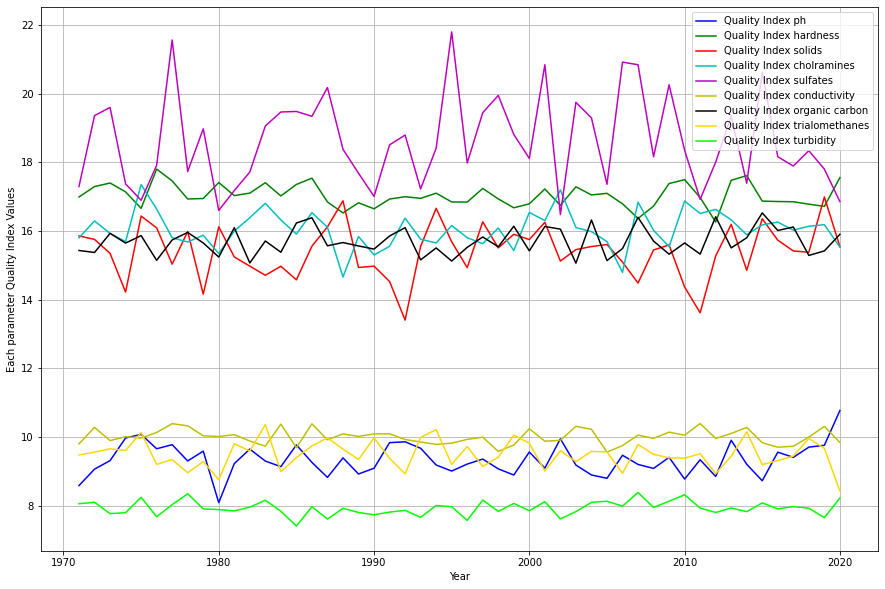

In [16]:
plt.figure(figsize=(15,10))
plt.plot(df4['Year'],df4['sub_index_ph'],color='b',label='Quality Index ph')
plt.plot(df4['Year'],df4['sub_index_Hardness'],color='g',label='Quality Index hardness')
plt.plot(df4['Year'],df4['sub_index_Solids'],color='r',label='Quality Index solids')
plt.plot(df4['Year'],df4['sub_index_Chloramines'],color='c',label='Quality Index cholramines')
plt.plot(df4['Year'],df4['sub_index_Sulfate'],color='m',label='Quality Index sulfates')
plt.plot(df4['Year'],df4['sub_index_Conductivity'],color='y',label='Quality Index conductivity')
plt.plot(df4['Year'],df4['sub_index_Organic_carbon'],color='k',label='Quality Index organic carbon')
plt.plot(df4['Year'],df4['sub_index_Trihalomethanes'],color='gold',label='Quality Index trialomethanes')
plt.plot(df4['Year'],df4['sub_index_Turbidity'],color='lime',label='Quality Index turbidity')


plt.xlabel('Year')
plt.ylabel('Each parameter Quality Index Values')

plt.grid()
plt.legend()

<i>a = df4.iloc[:,1:].mean(axis = 0)<br></br>
T for transpose<br></br>
Dataframe converts dictionary into Dataframe
</i>

In [17]:
a=df4.loc[:, df4.columns != 'Year'].mean(axis=0)
a = pd.DataFrame(a)
a = a.T
a.rename(columns = {'sub_index_ph':'ph', 'sub_index_Hardness':'hardness','sub_index_Solids':'solids','sub_index_Chloramines':'chloramines','sub_index_Sulfate':'sulfate','sub_index_Conductivity':'conductivity','sub_index_Organic_carbon':'carbon','sub_index_Trihalomethanes':'trialomethnes','sub_index_Turbidity':'turbidity'}, inplace = True)
a

,ph,hardness,solids,chloramines,sulfate,conductivity,carbon,trialomethnes,turbidity
0,9.336572,17.035855,15.410839,16.046419,18.628603,10.00364,15.69927,9.497142,7.935686


[<span style="color:MediumSeaGreen">Pandas Dataframe</span>](https://www.geeksforgeeks.org/python-pandas-dataframe-columns/)<br></br>
[<span style="color:MediumSeaGreen">Pandas Extracting Data</span>](https://datacarpentry.org/python-socialsci/09-extracting-data/index.html)<br></br>
[<span style="color:MediumSeaGreen">Select rows from dataframe</span>](https://www.geeksforgeeks.org/how-to-select-rows-from-a-dataframe-based-on-column-values/)

In [18]:
pollutants=['ph','hardness','solids','chloramines','sulfate','conductivity','carbon','trialomethnes','turbidity']
values=[9.336572,17.035855,15.410839,16.046419,18.628603,10.00364,15.69927,9.497142,7.935686]

[<span style="color:MediumSeaGreen">Diff. b/w loc and iloc</span>](https://www.geeksforgeeks.org/difference-between-loc-and-iloc-in-pandas-dataframe/)

Text(0.5, 1.0, 'Overall Percentage Contributions of each pollutants across 50 years')

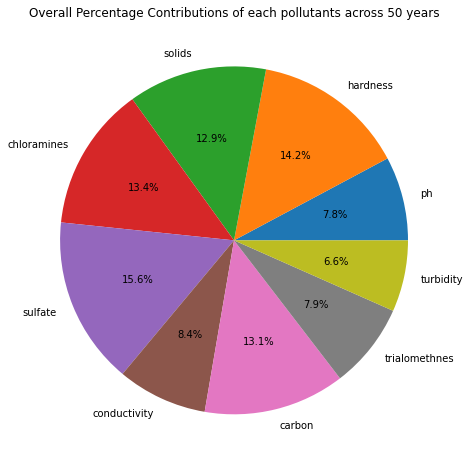

In [19]:
plt.figure(figsize=(8,8))
myexplode = [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0]
plt.pie(values, labels = pollutants ,explode=myexplode , autopct='%1.1f%%')
plt.title('Overall Percentage Contributions of each pollutants across 50 years')

In [22]:
df2=z.groupby('Year')['Final WQI'].mean()
df2

Year
1971    108.722356
1972    112.025744
1973    111.536590
1974    107.494408
1975    111.562238
1976    110.613786
1977    113.369821
1978    109.931561
1979    108.843775
1980    107.382547
1981    109.277714
1982    108.696479
1983    111.953845
1984    110.377674
1985    110.059842
1986    113.459376
1987    112.332262
1988    109.782307
1989    108.016924
1990    107.215336
1991    108.671667
1992    108.397037
1993    108.162420
1994    111.349736
1995    112.620644
1996    108.319513
1997    111.718672
1998    110.848954
1999    110.860141
2000    110.541651
2001    113.770826
2002    108.730051
2003    111.087007
2004    112.103717
2005    108.159156
2006    109.780932
2007    113.157811
2008    109.475282
2009    111.774428
2010    110.503422
2011    107.197654
2012    109.279470
2013    112.331817
2014    109.818807
2015    113.672553
2016    109.962677
2017    109.461456
2018    109.818059
2019    110.755817
2020    107.886765
Name: Final WQI, dtype: float64

In [23]:
data1=df2.reset_index(level=0,inplace=False)
data1

,Year,Final WQI
0,1971,108.722356
1,1972,112.025744
2,1973,111.536590
3,1974,107.494408
4,1975,111.562238
5,1976,110.613786
6,1977,113.369821
7,1978,109.931561
8,1979,108.843775
9,1980,107.382547


#### <center> Printed Number of years just below when Water was safe to drink i.e-WQI<100 </center>

In [24]:
print("Count of WQI values less than 100 is(means good  to use) : ", data1[data1['Final WQI'] < 100]['Year'].count())
  
# resultant of above dataframe
data1[data1['Final WQI']<100]

Count of WQI values less than 100 is(means good  to use) :  0


,Year,Final WQI


<i>scatter plot of data points collected from df2 of last 50 years<br></br>
figsize() takes two parameters- width and height (in inches).<br></br> 
By default the values for width and height are 6.4 and 4.8 respectively.plt.figure(figsize=(x,y))</i>

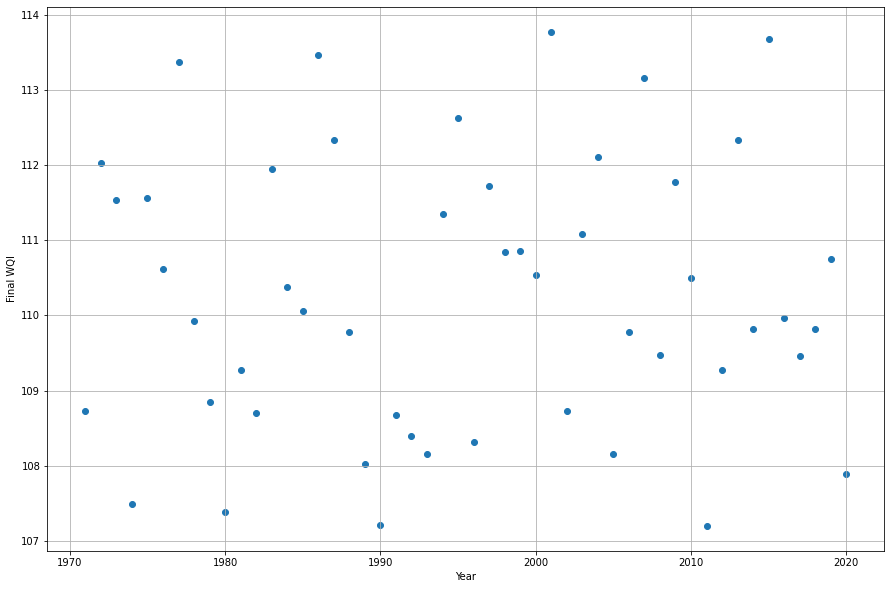

In [25]:
plt.figure(figsize=(15,10)) 
plt.scatter(data1['Year'],data1['Final WQI'])
plt.xlabel('Year')
plt.ylabel('Final WQI')
plt.grid()

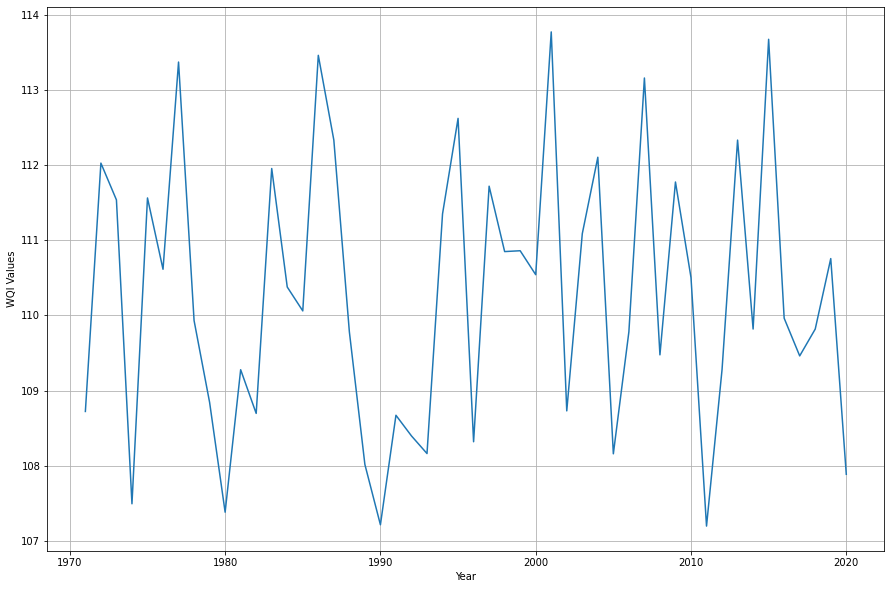

In [26]:
import matplotlib.pyplot as plt
cols =['Year']
y = data1['Final WQI']
x=data1[cols]

plt.figure(figsize=(15,10))
plt.plot(x,y)

plt.xlabel('Year')
plt.ylabel('WQI Values')

plt.grid()

#### <center>all Data Analysis done upto here</center>

### <center>Phase 3 : Train the ML model and Prediction</center>

In [27]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [28]:
cols =['Year']

In [29]:
y = data1['Final WQI']
x = data1[cols]

[<span style="color:MediumSeaGreen">Train Test Split Doc.</span>](https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/)

<i>The random_state splits a randomly selected data but with a twist. And the twist is the order of the data will be same for a particular value of random_state.You need to understand that it's not a bool accpeted value. Starting from 0 to any integer no, if you pass as random_state,it'll be a permanent order for it. Ex: the order you will get in `random_state=0` remain same. After that if you execuit `random_state=5` and again come back to `random_state=0` you'll get the same order. And like 0 for all integer will go same. How ever `random_state=None` splits randomly each time.<br></br>
* when `random_state` set to an `integer`, train_test_split will return `same` results for each execution<br></br>
* when `random_state` set to an `None`, train_test_split will return `different` results for each execution.</i>

In [30]:
reg=linear_model.LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

<i>`Fitting` the `Regressior` with Train set</i>

In [31]:
reg.fit(x_train,y_train)

LinearRegression()

<i>`Predicting` values of `WQI` of Test set year values</i>

In [32]:
a=reg.predict(x_test)
a

array([110.3076025 , 110.22464002, 110.21975987, 110.3710444 ,
       110.18071871])

<i>Below are the `actual` values of `WQI` of Test set year values</i>

In [33]:
y_test

28    110.860141
11    108.696479
10    109.277714
41    109.279470
2     111.536590
Name: Final WQI, dtype: float64

<i>Mean Squared Error :</i>  
$$\frac{1}{n} \sum\limits_{i=1}^{n} {(y_i - m(reggressior_{slope})*x_i - c(regressior_{intercept}))^2}$$

In [34]:
from sklearn.metrics import mean_squared_error
print('mse:%f'%mean_squared_error(y_test,a))

mse:1.311589


<i>Root Mean Squared Error :</i>  
$$\sqrt{ \frac{1}{n} \sum\limits_{i=1}^{n} {(y_i - m(reggressior_{slope})*x_i - c(regressior_{intercept}))^2} }$$

In [35]:
print('rmse:%f'%sqrt(mean_squared_error(y_test,a)))

rmse:1.145246


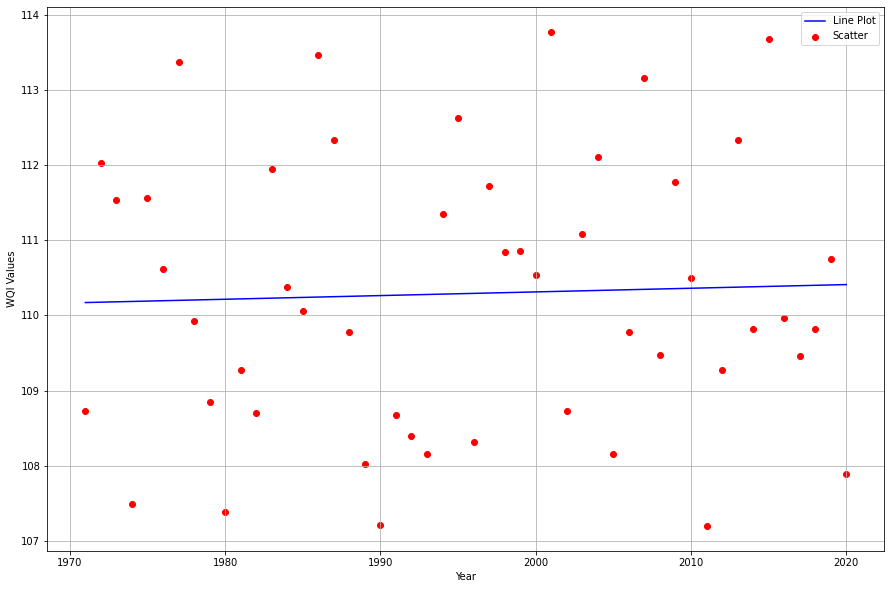

In [36]:
%matplotlib inline 
cols =['Year']
y = data1['Final WQI']
x=data1[cols]

plt.figure(figsize=(15,10))
plt.scatter(x,y,color='r',label='Scatter')
plt.plot(data1.Year,reg.predict(data1[['Year']]),color='b',label='Line Plot')

plt.xlabel('Year')
plt.ylabel('WQI Values')
plt.legend()
plt.grid()

In [37]:
print('Slope of regressior is : %f'%reg.coef_)

Slope of regressior is : 0.004880


In [38]:
print('Y intercept of regressior is : %f'%reg.intercept_)

Y intercept of regressior is : 100.552191


#### <center>Obtained Regression Line is : </center>
$$ Y = 0.004880*X + 100.552191 $$

<i>Checking the predicted values of future may be using this regressior</i>

In [39]:
print('Predicted value of WQI in year 2021 : %f'%reg.predict([[2021]]))

Predicted value of WQI in year 2021 : 110.414966


In [40]:
def f(x):
    if x<=2020 : 
      print('Predicted value of WQI in year %s is : %f and actual value is : %f'%(x , reg.predict([[x]]) , data1.loc[data1['Year'] == x]['Final WQI']))
    else : 
      print("Predicted value of WQI (Future Prediction) in year %s : %f"%(x,reg.predict([[x]])))

In [41]:
interact(f,x=(1971,2030));

interactive(children=(IntSlider(value=2000, description='x', max=2030, min=1971), Output()), _dom_classes=('wi…

[<span style="color:MediumSeaGreen">Regression Metrices 2</span>](https://scikit-learn.org/stable/modules/classes.html#regression-metrics)<br></br>
[<span style="color:MediumSeaGreen">Regression Metrices 2</span>](https://machinelearningmastery.com/regression-metrics-for-machine-learning/)<br></br>

[<span style="color:MediumSeaGreen">Pyhton Details</span>](https://notebook.community/dadavidson/Python_Lab/Complete-Python-Bootcamp/Print%20Formatting)<br></br>

[<span style="color:MediumSeaGreen">Pyhton Widgets 1</span>](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Styling.html)<br></br>
[<span style="color:MediumSeaGreen">Pyhton widgets 2</span>](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html)<br></br>
[<span style="color:MediumSeaGreen">Pyhton Widgets 3</span>](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html)

#### <center>accuracy measurement of the model</center>

[<span style="color:MediumSeaGreen">Linear Regression 1</span>](https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/)<br></br>
[<span style="color:MediumSeaGreen">Linear Regression 2</span>](https://www.geeksforgeeks.org/python-linear-regression-using-sklearn/)

<i>Accuracy (e.g- classification accuracy) is a measure for classification, not regression so we can't calculate accuracy for a regression model. For regression, one of the matrices we've to get the score (ambiguously termed as accuracy) is R-squared $R^2$

You can get the $R^2$ score (i.e- accuracy) of your prediction using the score(X, y, sample_weight=None) function from LinearRegression as follows by changing the logic accordingly.</i>

_Mean Squared Error_ _**MSE**_ formula is :
    $$ \frac{1}{n} \sum\limits_{i=1}^{n} {(\Delta i)^2} $$<br></br>
    $$ (\Delta i)^2 = (y_{predicted} - y_i)^2 $$<br></br>
    $$ y_{predicted} = m(reggressior_{slope})*x_i + c(regressior_{intercept}) $$

In [42]:
x_test1=[data1.iloc[7]['Year'],data1.iloc[13]['Year'],data1.iloc[14]['Year'],data1.iloc[29]['Year'],data1.iloc[39]['Year']]
y_test1=[data1.iloc[7]['Final WQI'],data1.iloc[13]['Final WQI'],data1.iloc[14]['Final WQI'],data1.iloc[29]['Final WQI'],data1.iloc[39]['Final WQI']]
df_x = pd.DataFrame(x_test1, index =['0', '1', '2', '3', '4'],columns =['Year'])
df_y = pd.DataFrame(y_test1, index =['0', '1', '2', '3', '4'],columns =['Final WQI'])

<i>r2score = r2_score(y_test,a)<br></br>
print('accuracy of our model based on RSME is : %f '%sqrt(mean_squared_error(y_test,a)))</i>

$$ R^2 = 1 - {SE_{\hat y} \over SE_{\bar y}} $$ 
<i>SE = Squared Error<br></br>${\hat y}$ =Regressior Line<br></br>$y={\bar y}$ line parallel to X axis through ${\bar y}$</i>

[<span style="color:MediumSeaGreen">Metrics and scoring of predictions</span>](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)

In [43]:
acc=reg.score(df_x,df_y)*100
print('%.0f'%acc)

33


[<span style="color:MediumSeaGreen">create pandas dataframe from list</span>](https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-lists/)<br></br>

[<span style="color:MediumSeaGreen">Gradient Descent 1</span>](https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f/)<br></br>
[<span style="color:MediumSeaGreen">Gradient Descent 2</span>](https://atmamani.github.io/projects/ml/gradient-descent-in-python/)
<br></br>
[<span style="color:MediumSeaGreen">Gradient Descent 3</span>](https://scipython.com/blog/visualizing-the-gradient-descent-method/)
<br></br>

[<span style="color:MediumSeaGreen">Numpy array 2d to 1d</span>](https://www.geeksforgeeks.org/python-flatten-a-2d-numpy-array-into-1d-array/)<br></br>
[<span style="color:MediumSeaGreen">Dataframe to Numpy Array](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html)

<i>to convert an pandas dataframe to numpy array use dataframe=dataframe.to_numpy()<br></br>
to flatten a 2d numpy array to 1d array use arrayname=arrayname.flatten()</i>

<i><span style="color:blue">y=y.to_numpy()</span></i>

In [45]:
y

array([108.72235634, 112.02574398, 111.53658997, 107.49440822,
       111.5622377 , 110.61378621, 113.36982092, 109.93156069,
       108.84377542, 107.38254732, 109.27771443, 108.69647908,
       111.9538449 , 110.37767425, 110.05984248, 113.4593764 ,
       112.33226185, 109.78230677, 108.0169242 , 107.21533587,
       108.67166705, 108.39703702, 108.16242037, 111.34973621,
       112.62064423, 108.31951259, 111.71867211, 110.84895367,
       110.86014108, 110.54165067, 113.77082613, 108.73005124,
       111.08700667, 112.10371692, 108.15915587, 109.78093218,
       113.15781114, 109.47528157, 111.77442795, 110.50342215,
       107.19765448, 109.27947046, 112.33181699, 109.81880688,
       113.67255252, 109.9626766 , 109.46145634, 109.81805882,
       110.7558175 , 107.88676466])

<i><span style="color:blue">
<br>x=x.to_numpy()</br>
<br>x=x.flatten()</br></span></i>

In [46]:
x

array([1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

_**Gardient Descent**_ is an important concept basically <br></br><u>_Gradient Descent is an alogrithm that finds the best fit 
line for given training data set_</u>

<center><i>Basic Formulas used to find Gradient Descent are</i></center>
$$ \frac{\delta}{\delta m} = \frac{2}{n} \sum\limits_{i=1}^{n} x_i((m*x_i+c) - y_i) $$ <br></br>
$$ \frac{\delta}{\delta c} = \frac{2}{n} \sum\limits_{i=1}^{n} ((m*x_i+c) - y_i) $$ <br></br>
$$ m=m - learning rate * \frac{\delta}{\delta m} $$<br></br>
$$ c=c - learning rate * \frac{\delta}{\delta c} $$

<i>Find a local minima of the given function $Y=x^2+16-8x$ which pretty resembles The `Cost Function` And we know<br></br>
Total value of Error can be measured in various ways but two techniques mostly used are<br></br>
* Mean Squared Error(MSE)<br></br>
* Mean Absolute Error(MAE)<br></br>

Now to find the `Minimum Value` of total error will always be used `MSE` as we can find minima using `Derivative` but<br></br> 
Modulo function is `Not Diffentiable` So we will avoid that.<br></br>

We are interested in finding out at what value of x this function $f(x)$ accure least value<br></br>

So there are various ways two of them are : 
1. **Direct Differentiation**<br></br>

$ \frac{dy}{dx}{|_{=0}} $  i.e-  $f'(x)=0|_{x=c}$<br></br>

But it's not recomended approach in machine learning because when we have large dataset<br></br>
So this becomes very difficult to find that `minima` value<br></br>

So we will learn about an `Iterative Method` :<br></br>
2. **Gradient Descent**<br></br>

Steps of `Gradient Descent` : 
* Start with any random value of x<br></br>
* And we know Cost Function(MSE) is a parabolic function so y-value will decrease either towards left or towards right<br></br>
* Let's always start at value x=0<br></br>
* And take small steps towards minima of the function<br><br>
 * Now small step is taken based on two things :<br></br>
  1. Direction(uphill or downhill)<br></br>
  2. Step size
* As we will take downhill so we will do -ve gradient , So that if $f(x)$ is at higher value or at lower value already<br></br> then -ve gradient will approach towards $min(f(x))$ 
* So our `Gradient Descent` will be like $$x = x - {\eta}\frac{dy}{dx}$$ <br></br> ${\eta}$ = learning rate 
* For each iteration $ {\eta}\frac{dy}{dx} $ will decrease towards `Zero` value of gradient and<br></br> also `Step Size` ${\eta}$ will also decrease gradually 

</i>
<img src="https://www.algebra.com/cgi-bin/plot-formula.mpl?expression=+graph%28+500%2C+500%2C+-10%2C+10%2C+-10%2C+10%2C+0%2Cabs%28x-4%29%29+" alt="Y=|X-4|" height="50" width="300" align="left" />
  <img src="https://useruploads.socratic.org/YbrWAtYFQWOD1JWSVQrB_image.jpeg" alt="Y=(X-4)^2" height="50" width="300" align="right" /><br></br>

<img src="https://miro.medium.com/max/600/1*iNPHcCxIvcm7RwkRaMTx1g.jpeg" alt="Gradient Descent" height="300" width="300" align="left" />
<img src="https://miro.medium.com/max/2048/1*G1v2WBigWmNzoMuKOYQV_g.png" alt="Gradient Descent" height="600" width="600" align="right" />

In [47]:
def gradient_descent(x,y) :
    m_curr=0
    c_curr=0
    iterations=310
    n=len(x)
    learning_rate=0.000000009999999999999999999999999999
    regression_line = [(m_curr*xi) + c_curr for xi in x]
    plt.figure(figsize=(15,10))
    plt.scatter(x,y,color='r',label='Actual values of WQI')
    plt.plot(x , regression_line , color='g',label='Predicted values of WQI')
    plt.xlabel('Year')
    plt.ylabel('WQI Values')
    plt.title('Gradient Descent Visualization')
    plt.grid()
    plt.legend()
    
    for i in range(iterations):
        y_predicted = m_curr * x + c_curr
        cost = (1/n)*sum([val**2 for val in (y_predicted-y)])
        md = (2/n)*sum(x*(y_predicted-y))
        cd = (2/n)*sum(y_predicted-y)
        m_curr = m_curr - learning_rate * md
        c_curr = c_curr - learning_rate * cd
        regression_line = [(m_curr*xi) + c_curr for xi in x]
        plt.plot(x , regression_line , color='g')
        

<i>print("m {},c {},cost {} ,iteration {}".format(m_curr,c_curr,cost,i))<br></br>
var=isclose(cost, prev_cost, rel_tol = 1e-11 - 1, abs_tol = 0.0)</i>

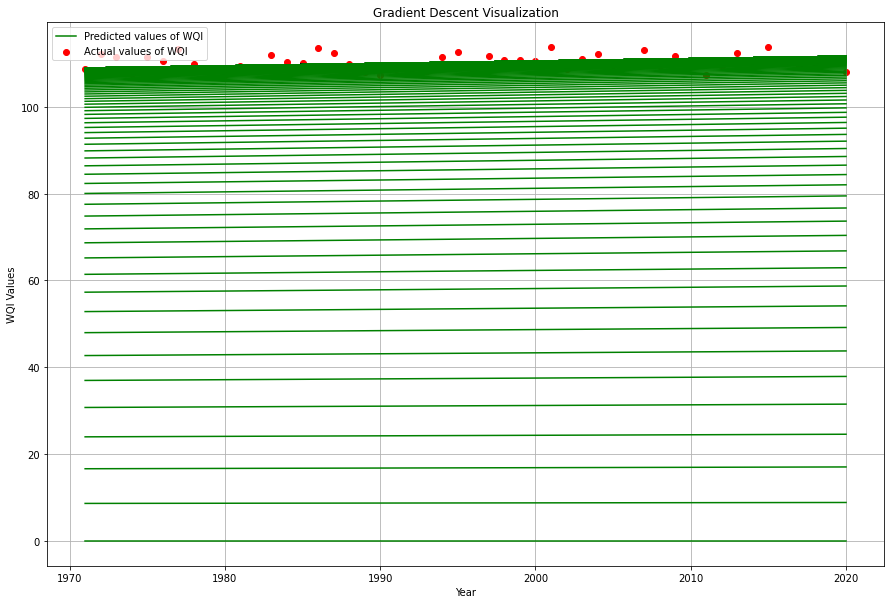

In [48]:
gradient_descent(x,y)

In [49]:
costlist=[] 
iteration=[]
slope_list=[]
intercept_list=[]
def costing(x,y) :
    m_curr=0
    c_curr=0
    slope_list.append(m_curr)
    intercept_list.append(c_curr)
    iterations=310
    n=len(x)
    learning_rate=0.000000009999999999999999999999999999
    
    for i in range(iterations):
        iteration.append(i)
        y_predicted = m_curr * x + c_curr
        cost = (1/n)*sum([val**2 for val in (y_predicted-y)])
        costlist.append(cost)
        md = (2/n)*sum(x*(y_predicted-y))
        cd = (2/n)*sum(y_predicted-y)
        m_curr = m_curr - learning_rate * md
        c_curr = c_curr - learning_rate * cd
        slope_list.append(m_curr)
        intercept_list.append(c_curr)

In [50]:
costing(x,y)

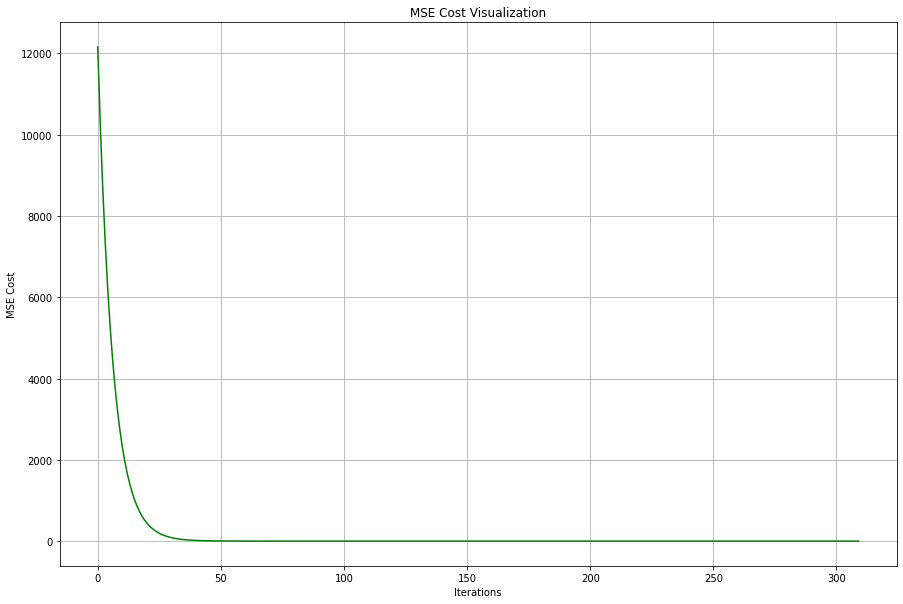

In [51]:
plt.figure(figsize=(15,10))
plt.plot(iteration,costlist,color='g')
plt.xlabel('Iterations')
plt.ylabel('MSE Cost')
plt.title('MSE Cost Visualization')
plt.grid()

<i>slope_list_sliced = slope_list[-40:]<br></br>
intercept_list_sliced = slope_list[-40:]<br></br>
slope_list_sliced , intercept_list_sliced = np.meshgrid( slope_list_sliced , intercept_list_sliced )</i>

<i>slope_list_sliced = slope_list[:50]<br></br>
intercept_list_sliced = slope_list[:50]<br></br>
slope_list_sliced , intercept_list_sliced = np.meshgrid( slope_list_sliced , intercept_list_sliced )</i>

<i><span style="color:blue">slope_list , intercept_list = np.meshgrid( slope_list , intercept_list )<br></br>
Z=np.zeros(slope_list.shape)</span></i>

In [68]:
slope_list , intercept_list = np.meshgrid( slope_list , intercept_list )
Z=np.zeros(slope_list.shape)
n=len(x)
def chngofcost(x,y):
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            y_= slope_list[i,j]*x+intercept_list[i,j]
            Z[i,j]= (1/n)*sum([val**2 for val in (y_-y)])

In [ ]:
chngofcost(x,y)
for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            print(Z[i][j])

[<span style="color:MediumSeaGreen">Angle of 3D plot</span>](https://www.geeksforgeeks.org/how-to-change-angle-of-3d-plot-in-python/)<br></br>
[<span style="color:MediumSeaGreen">Surface and contour plots</span>](https://www.geeksforgeeks.org/surface-plots-and-contour-plots-in-python/)<br></br>
[<span style="color:MediumSeaGreen">Colorbar of 3d plots</span>](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html)

Text(0.5, 0, '<--Cost Value')

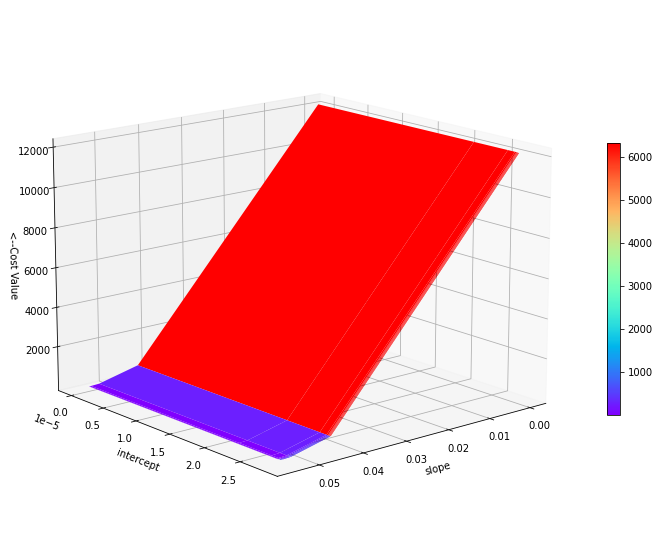

In [70]:
fig = plt.figure(figsize=[15,10])
axes = plt.axes(projection="3d")
surf = axes.plot_surface(slope_list,intercept_list,Z,rstride=1,cstride=1,cmap='rainbow')
fig.colorbar(surf , shrink=0.5 )

axes.view_init(elev=15 , azim=50)
axes.set_xlabel('slope')
axes.set_ylabel('intercept')
axes.set_zlabel('<--Cost Value')

In [124]:
theta=[]
errors=[]
def error(x,y) : 
    m_curr=0
    c_curr=0
    iterations=310
    n=len(x)
    learning_rate=0.000000009999999999999999999999999999
    
    for i in range(iterations):
        y_predicted = m_curr * x + c_curr
        e = (1/n)*sum([val**2 for val in (y_predicted-y)])
        errors.append(e)
        md = (2/n)*sum(x*(y_predicted-y))
        cd = (2/n)*sum(y_predicted-y)
        m_curr = m_curr - learning_rate * md
        c_curr = c_curr - learning_rate * cd
        theta.append((m_curr,c_curr))

In [125]:
error(x,y)

<i>fig = plt.figure()<br></br>
ax = plt.axes(projection="3d")<br></br>
def z_function(x, y):
    return np.sin(np.sqrt(x * 2 + y * 2))<br></br>

x = np.linspace(-6, 6, 30)<br></br>
y = np.linspace(-6, 6, 30)<br></br>

X, Y = np.meshgrid(x, y)<br></br>
Z = z_function(X, Y)</i>

<i>using list comprehension convert list of tuples to list of list<br></br>
res = [list(ele) for ele in test_list]</i>

<i>theta=np.array(theta)</i>

In [126]:
theta = np.array(theta)

In [127]:
errors = np.array(errors)

In [ ]:
theta

<i>theta[:,1].shape</i>

Text(0.5, 0, '<--Cost Value')

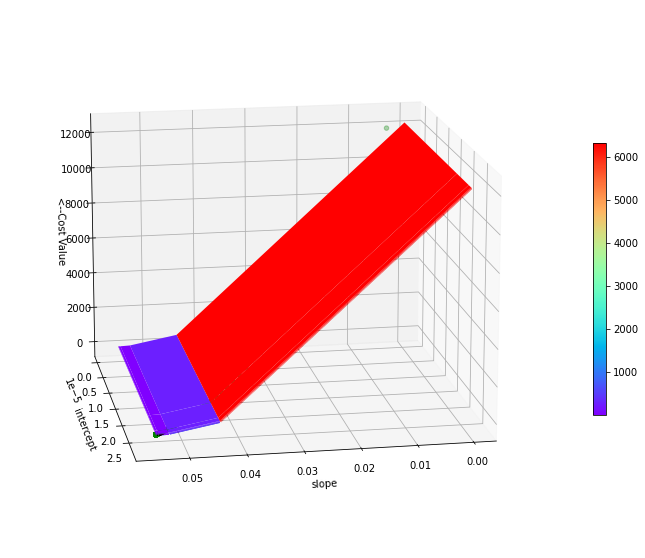

In [129]:
fig = plt.figure(figsize=[15,10])
axes = plt.axes(projection="3d")
surf = axes.plot_surface(slope_list,intercept_list,Z,rstride=1,cstride=1,cmap='rainbow')
axes.scatter(theta[:,0],theta[:,1],errors,color='green')
fig.colorbar( surf , shrink=0.5 )

axes.view_init(elev=15 , azim=80)
axes.set_xlabel('slope')
axes.set_ylabel('intercept')
axes.set_zlabel('<--Cost Value')

In [84]:
dfy = pd.DataFrame(x, columns=['Year'])
dfwqi = pd.DataFrame(y, columns=['WQI'])
a=reg.predict(dfy)
print('mse : %f'%mean_squared_error(a,dfwqi))

mse : 3.276552
